# Classifcation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv('churn.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
churn.describe()

,has_churned,time_since_first_purchase,time_since_last_purchase
count,400.000000,400.000000,400.000000
mean,0.500000,-0.034370,0.144549
std,0.500626,0.952936,1.103133
min,0.000000,-1.273770,-0.870666
25%,0.000000,-0.828377,-0.645824
50%,0.500000,-0.152072,-0.265036
75%,1.000000,0.544826,0.571214
max,1.000000,3.738312,5.928242


# EDA

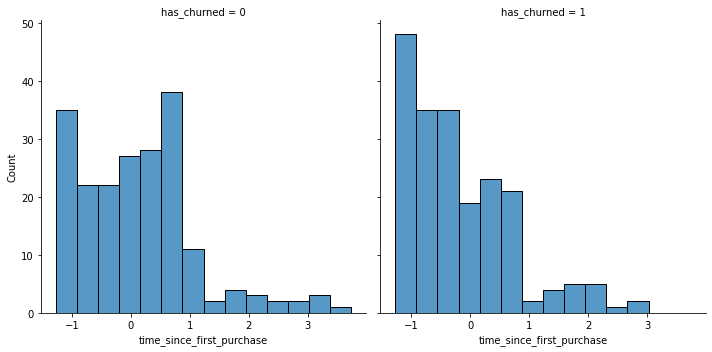

In [5]:
# plot distribution of 'time_since_first_purchase' grouped by 'has_churned'
sns.displot(x='time_since_first_purchase', col='has_churned', data=churn)
plt.show()

Customers with shorter length of relationship tend to churn more frequently

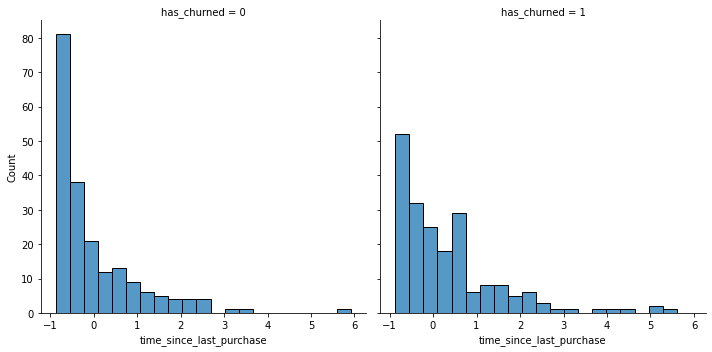

In [6]:
# plot distribution of 'time_since_last_purchase' grouped by 'has_churned'
sns.displot(x='time_since_last_purchase', col='has_churned', data=churn)
plt.show()

Customers churned had less recent activities.

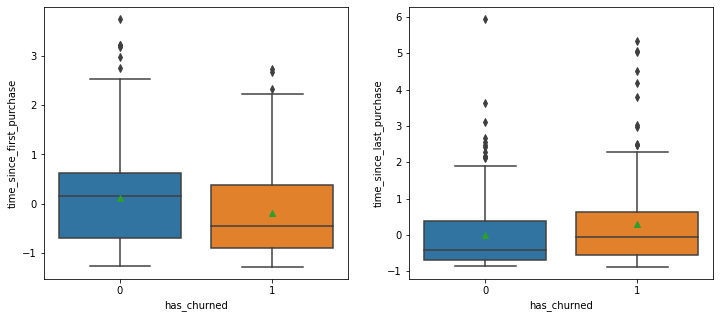

In [7]:
# visualize distribution of churning
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x = 'has_churned', y='time_since_first_purchase', data = churn, showmeans=True, ax=ax[0])
sns.boxplot(x='has_churned', y = 'time_since_last_purchase', data = churn, showmeans = True, ax=ax[1])
plt.show()

The boxplot indicates that customers with shorter length of relationship and less recent activities tend to churn more frequently. 

# k-Nearest Neighbors

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# create features and target variable
X = churn.drop('has_churned', axis=1)
y = churn['has_churned']

In [10]:
# instantiate classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# fit Classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [11]:
# create a set of unseen data
from itertools import product
time_since_first_purchase = np.arange(churn['time_since_first_purchase'].min(), churn['time_since_first_purchase'].max(), .5)
time_since_last_purchase = np.arange(churn['time_since_last_purchase'].min(), churn['time_since_last_purchase'].max(), .5)

# create p as all combinations of values of time_since_last_purchase  and time_since_first_purchase
p = product(time_since_first_purchase, time_since_last_purchase)
p

In [12]:
# transform p into DF and name columns
features = pd.DataFrame(p, columns = ['time_since_first_purchase', 'time_since_last_purchase'])
features.head()

,time_since_first_purchase,time_since_last_purchase
0,-1.27377,-0.870666
1,-1.27377,-0.370666
2,-1.27377,0.129334
3,-1.27377,0.629334
4,-1.27377,1.129334


In [13]:
# predict data for training data X
y_predict = knn.predict(X)

# predict data for new features
y_new_predict = knn.predict(features)

# add a column of prediction
prediction_data = features.assign(has_churned = y_new_predict)
prediction_data

,time_since_first_purchase,time_since_last_purchase,has_churned
0,-1.27377,-0.870666,1
1,-1.27377,-0.370666,1
2,-1.27377,0.129334,1
3,-1.27377,0.629334,1
4,-1.27377,1.129334,1
...,...,...,...
149,3.72623,3.629334,1
150,3.72623,4.129334,1
151,3.72623,4.629334,1
152,3.72623,5.129334,1


# Train_test_split

In [14]:
from sklearn.model_selection import train_test_split

X = churn.drop('has_churned', axis=1)
y = churn['has_churned']

# randomly split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42, stratify = y)

# instantiate a k_NN Classifier with 8 neighbors
knn_8 = KNeighborsClassifier(n_neighbors = 8)

# fit Classifier to the training data
knn_8.fit(X_train, y_train)

# make prediction on test data
y_pred = knn_8.predict(X_test)

# compute accuracy of the model
knn_8.score(X_test, y_test)

0.5416666666666666

In [15]:
knn_8.score(X_train, y_train)

0.7071428571428572

# Overfitting and underfitting

Compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, we develop an intuition for overfitting and underfitting. 

In [16]:
# setup array to store train and test accuracies
neighbors = np.arange(1, 15)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [17]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
print(train_accuracy)

[-1.27377002 -0.91576415 -0.55775828 -0.19975241  0.15825346  0.51625933
  0.8742652   1.23227107  1.59027694  1.94828281  2.30628868  2.66429455
  3.02230042  3.38030629]


In [18]:
# loop over different values of k
for i, k in enumerate(neighbors):
    # setup kNN Classifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors = k)
    # fit Classifier to the train data
    knn.fit(X_train, y_train)
    # compute accuracy of the training data
    train_accuracy[i] = knn.score(X_train, y_train)
    # compute accuracy of the testing data
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

[0.99642857 0.8        0.79285714 0.72142857 0.73214286 0.73214286
 0.73571429 0.70714286 0.68928571 0.70714286 0.71785714 0.70714286
 0.7        0.69642857]
[0.5        0.54166667 0.49166667 0.48333333 0.48333333 0.50833333
 0.53333333 0.54166667 0.54166667 0.55       0.54166667 0.55833333
 0.54166667 0.53333333]


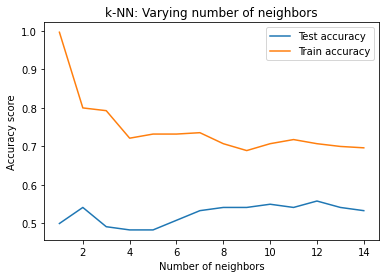

In [19]:
# plot test_accuracy and train_accuracy
plt.plot(neighbors, test_accuracy, label='Test accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.title('k-NN: Varying number of neighbors')
plt.show()

The test accuracy is highest when using 12 neighbors. Using 13 neighbors or more result in a simple model that underfit the data. 

# Regression

In [20]:
gapminder = pd.read_csv('gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [21]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [22]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [23]:
# create array for features and target variable
X = gapminder['fertility'].values
y = gapminder['life'].values

In [24]:
print(X.shape)
print(y.shape)

(139,)
(139,)


In [25]:
#  reshape X and y
X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

In [26]:
print(X_reshaped.shape)
print(y_reshaped.shape)

(139, 1)
(139, 1)


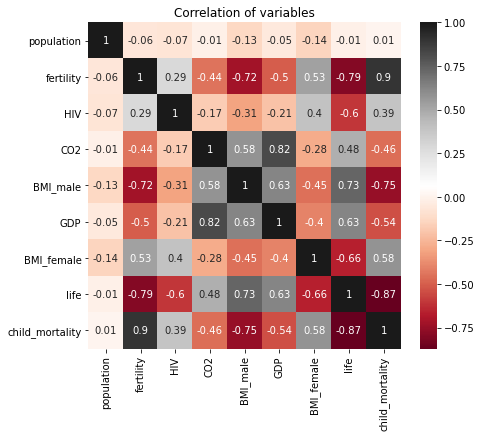

In [27]:
# compute correlations and quantify the strength of linear relationship between variables
plt.figure(figsize=(7, 6))
sns.heatmap(round(gapminder.corr(), 2), annot=True, cmap='RdGy')
plt.title('Correlation of variables')
plt.show()

The heatmap indicates strong negative correlation between life expectancy ('life' column) and average number of kids ('fertility' column).

Fit and predict for regression.

In [28]:
#  import LinearRegression
from sklearn.linear_model import LinearRegression

# innstantiate the model
reg = LinearRegression()

# set up the prediction space to range from the min to the max of X
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped))
prediction_space.shape

(50, 1)

In [29]:
# fit the model  to the data
reg.fit(X_reshaped, y_reshaped)

# compute prediction over the prediction space
y_pred = reg.predict(prediction_space)

# compute R-squared
reg.score(X_reshaped, y_reshaped)

0.6192442167740035

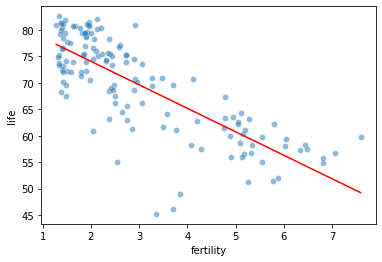

In [30]:
# plot regression line
fig, ax = plt.subplots()
sns.scatterplot(x='fertility', y='life', data=gapminder, alpha=.5)
plt.plot(prediction_space, y_pred, color='red')
plt.show()

# Train_test_split for Regression

Train and test sets are vital to ensure that our supervised learning model is able to generalize well to new data. This is True for both classification models and linear regression models. 

Now we will split gapminder dataset into training and ttesting sets, and then fit and predict a linear regression over all features. In addition to computing the score, we also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
# create features and target variable
X = gapminder.drop(['life', 'Region'], axis=1)
y = gapminder['life']

# split gapminder dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# instantiate Regression model
reg_all = LinearRegression()

# fit regressor to the training data
reg_all.fit(X_train, y_train)

# predict on the test data
y_pred = reg_all.predict(X_test)

# compute R-squares
print(reg_all.score(X_test, y_test))

# compute RMSEE. To do this, first compute the Mean Squared Error using mean_squared_error()
# with the arguments y_test and y_pred, and then take its square root using np.sqrt()
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE)

0.838046873143013
3.247601080036951


Using all features has improved the model score. This make sense, as the model has more information to learn from.

# Cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data. 

In [33]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [34]:
X = gapminder.drop(['life', 'Region'], axis=1).values
y = gapminder['life'].values

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# create a Linear Regression object
reg = LinearRegression()

# compute 5_fold cross validation scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# compute average cross-validation score
print(cv_scores)
print(np.mean(cv_scores))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
0.8599627722793505


# Regularization: Lasso Regression

Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient munipulated by some alpha. This is also known as L1 regularization because the regularization term is L1 norm of coefficients. Regularization penalizes large coefficients to avoid overfitting. Lasso regression can be used to select important features of dataset. 

Fit a lasso regression to the Gapminder and plot the coefficients. Then find that the coefficients of some features are shrunk to 0, with only the most important ones remaining. 

In [36]:
from sklearn.linear_model import Lasso

# instantiate lasso regression
lasso = Lasso(alpha=.4, normalize=True)

# fit regression to the data
lasso.fit(X, y)

# compute the coefficients
lasso_coef = lasso.coef_
lasso_coef

array([-0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.07087587])

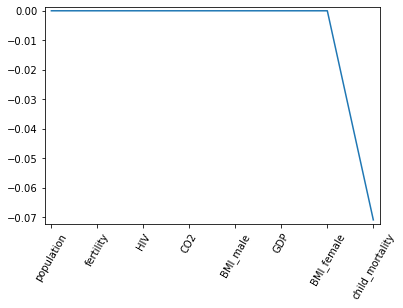

In [41]:
# plot the coefficients on the y-axis and column names on the x-axis
gapminder_columns = gapminder.drop(['life', 'Region'], axis = 1).columns

plt.plot(gapminder_columns, lasso_coef)
plt.xticks(rotation=60)
plt.show()

# Regularization: Ridge regression

If we took the sum of squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. 

We will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2scoresfor each, using the function that we have defined, which plots the R2 score as well as standard error for each alpha. 

# Fine tuning the model

Metrics for classification

Accuracy is not always an informative metric for classification models. Now we will compute confusion matrix and generate classification report. The classification report consisted of three rows, and an additional support column. the support givves a number of samples of the true responces that lie in the class. The precision, recall and f1-score columns gave the respective metrics for that particular class.  

In [42]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The goal is to predict whether or not a given femail patient will contract diabetes based on features such as BIM, age, and the number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. We train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report. 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# create features and target variables
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

# instantiate k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# fit classifier to the training data
knn.fit(X_train, y_train)

# make prediction on testing data
y_pred = knn.predict(X_test)

# generate confusion matrics
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[176,  30],
       [ 56,  46]], dtype=int64)

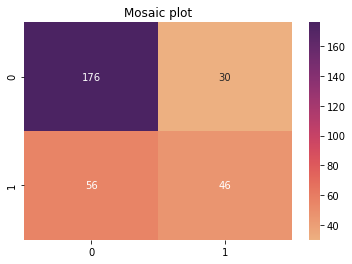

In [53]:
# plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='flare', vmin=30, vmax=176)
plt.title('Mosaic plot')
plt.show()

In [54]:
# extract TN, TP, FN, FP from confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

In [55]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



# Logistic regression and ROC curve

Scikit-learn makes it very easy to try different models, since the Train_test_split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'.

Check if logistic regression outperforms k-NN.

In [57]:
# import modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
diabetes.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [59]:
# create features and target variables
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# split data into training and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = .4, random_state = 42)

# instantiate logistic regression
logreg = LogisticRegression(max_iter=1000)

# fit classifier to the training data
logreg.fit(X_train, y_train)

# predict labels of the test set
y_pred = logreg.predict(X_test)

# compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[168,  38],
       [ 36,  66]], dtype=int64)

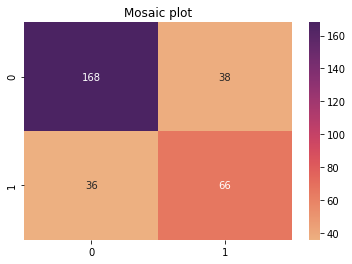

In [60]:
# create mosaic plot
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='flare')
plt.title('Mosaic plot')
plt.show()

In [61]:
# compute classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



# Plotting ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in particular class. 

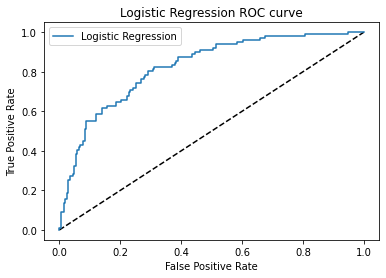

In [67]:
from sklearn.metrics import roc_curve

# using logreg classifier compute predicted probabilities of the labels of X_test
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# compute roc curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot roc curve with fpr on x-axis and tpr on y-axis
fig = plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.legend()
plt.show()

# Precision-recall curve

Precision-recall curve is another way to visually evaluate a moel performance. Precision-recall curve generated by plotting the precision and recall for different thresholds. This implementation is restricted to the binary classification task. 

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

In [68]:
from sklearn.metrics import precision_recall_curve

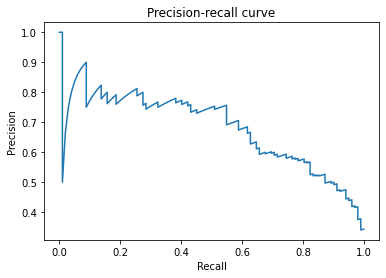

In [69]:
# generate precision_recall_curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot Precision_recall curve with Recall on x-axis and Precision on y-axis
fig = plt.figure()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()